# Classificação de Roupas com Deep Learning

Para o projeto usaremos o famoso dataset **Fashion MNIST**, muito utilizado para demonstrar certas técnicas ou praticar **Deep Learning** e **Computer Vision**.
O Conjunto de dados possui 70 mil imagens, sendo 60 mil amostras de treino e 10 mil de teste, distribuídas em 10 classes distintas perfeitamente balanceadas, como desmonstraremos mais a frente.

Por se tratar de um ***Dataset*** famoso e que importaremos direto do TensorFlow, não oferecerá grandes desafios para a parte de pré-processamento e limpeza de dados, aqui caberá mais a parte de demonstração do treinamento de uma rede neural, mais precisamente uma rede neural convolucional ou **Convolutional Neural Network - CNN**.


Abaixo a descrição dos 10 labels possíveis:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

## Um pouco de História

O *Fashion MNIST* foi criado como alternativa ao MNIST, tradicional dataset de dígitos manuscritos e muito utilizado em outros tempos, entretanto, com o surgimento de arquiteturas de Redes Neurais cada vez mais complexas, o conjunto de dados já não oferecia mais desafios, então caiu em desuso.


## Carregando os dados e Importando Bibliotecas Necessárias

Os dados estão disponíveis direto no TensorFlow, e aqui faremos a importação através da biblioteca, porém também estão disponíveis no repositório no Github e pode ser obtido [Clicando Aqui!](https://github.com/zalandoresearch/fashion-mnist)

In [29]:
# Importando as bibliotecas
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

# Melhorando a visualização gráfica

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)


# Carregando os dados
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data() 

## Exploração de Dados

Como dito na introdução, o *Fashion MNIST* já vem bem trabalhado e facilita muito a nossa vida no que se refere aos pré-processamentos, mas daremos uma olhada no formato dos dados para conhecê-los melhor.

In [3]:
# Olhando a dimensionalidade
print('Dimensões:')
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

Dimensões:
x_train:  (60000, 28, 28)
y_train:  (60000,)
x_test:  (10000, 28, 28)
y_test:  (10000,)


Como podemos ver, de fato temos 60 mil amostras de treino e 10 mil para teste. 
A dimensão nos dias que temos um número x de imagens, cada uma com 28 x 28 *PIXELS*, e 1 canal de cor.
Observe que se tivéssemos 3 canais de cores, como RGB por exemplo, teríamos algo como **(60000, 28, 28, 3)**, mas não é o caso aqui.

Vamos observar a dimensão de uma imagem para confirmar o que foi dito acima

In [17]:
x_train[0].shape



(28, 28)

Vamos agora dar uma olhada na estrutura desta imagem quando importada e convertida em array.

Para maior esclarecimento, precisamos entender como funciona a "leitura" de uma máquina quando falamos de imagens. Uma imagem nada mais é do que um conjunto de pixels, e o pixel por sua vez é o menor componente de uma imagem digital, e o que determina a "resolução" e "definição" da imagem é a 'quantidade de pixels por imagem (com toda a liberdade de expressão possível para facilitar o entendimento).
A medida que damos zoom em uma foto, somos capazes de ver 'quadrados' e estes representam os pixels.

A máquina entende a 'forma' nas imagens a partir da cor do pixel, que é representado por um valor dentro de uma escala que vai de $[0, 255]$. Este assunto pode ficar tão complexo quanto quisermos, então iremos nos ater apenas ao necessário para um maior entendimento do processo.

Para exemplificar, pegaremos um dos sistemas de cores mais conhecidos, o RGB. Este é um sistema de cores aditivas em que o Vermelho(**R**ed), Verde(**G**reen) e o Azul(**B**lue) são combinados de inúmeras formas, alcançando um largo espectro cromático.

Este sistema possui 3 canais de cores, e cada canal corresponderá a uma ***Matriz m x n***, ou seja, com **m** linhas e **n** colunas, e cada ponto dessa coluna corresponde a um *pixel* com valor entre 0 e 255, como fica claro na imagem abaixo. A combinação de valores dos pixels sobrepostos define a cor em cada ponto da imagem, e desta forma o máquina(O algoritmo) irá distinguir as formas ou características.

<p align="center"><img src="https://res.cloudinary.com/practicaldev/image/fetch/s--r90kzRN9--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://miro.medium.com/max/598/1%2AVZ2D3BS9avtqzOMvj-9vbQ.png" height="300px"></p>

Como já falamos acima, as imagens do nosso conjunto possuem apenas 1 canal, e as dimensões são 28 x 28, ou seja, cada imagem será uma matriz com 28 linhas e 28 colunas.

Primeiras 5 linhas da imagem 1: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]]

Plotando a mesma imagem:


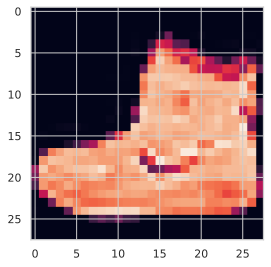

In [27]:
# visualizando as 5 primeiras linhas da primeira imagem
print('Primeiras 5 linhas da imagem 1: \n', x_train[0][:5])

# plotando a primeira imagem
print('\nPlotando a mesma imagem:')
plt.imshow(x_train[0]);

In [33]:
# Criando uma lista com os nomes dos labels em português
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

In [46]:
# Verificando o balanceamento dos dados
print('_________________________________')
print('Balanceamento dos dados de treino:\n')

for i in np.unique(y_train, return_counts = True)[0]:
    print('{}: {} '.format(class_names[i], np.unique(y_train, return_counts = True)[1][i]))

print('________________________________')    
print('Balanceamento dos dados de teste:\n')
for i in np.unique(y_test, return_counts = True)[0]:
    print('{}: {} '.format(class_names[i], np.unique(y_test, return_counts = True)[1][i]))

_________________________________
Balanceamento dos dados de treino:

Camisetas/Top: 6000 
Calça: 6000 
Suéter: 6000 
Vestidos: 6000 
Casaco: 6000 
Sandálias: 6000 
Camisas: 6000 
Tênis: 6000 
Bolsa: 6000 
Botas: 6000 
________________________________
Balanceamento dos dados de teste:

Camisetas/Top: 1000 
Calça: 1000 
Suéter: 1000 
Vestidos: 1000 
Casaco: 1000 
Sandálias: 1000 
Camisas: 1000 
Tênis: 1000 
Bolsa: 1000 
Botas: 1000 


Acima vemos que os dados estão PERFEITAMENTE balanceados, ou seja, temos a mesma quantidade de observações para cada tipo de label, e isso é de extrema importância para que se tenha um modelo com boa acurácia e generalista, ou seja, que faça boas previsões com dados nunca antes vistos.

Dados desbalanceados podem fazer com que seu modelo aprenda mais sobre determinadas características do que outras, por isso a importância de dados bem balanceados.

Agora plotaremos mais algumas imagens para termos uma ideia melhor dos nossos dados.

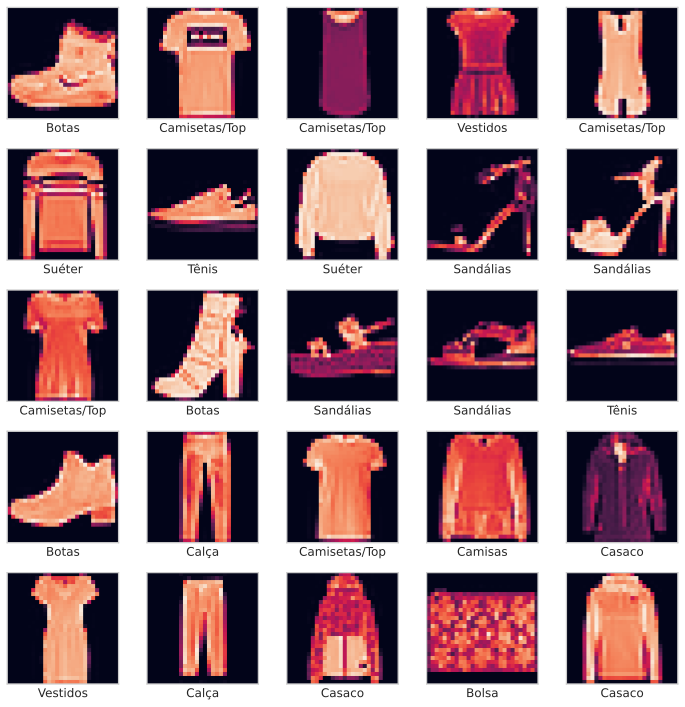

In [50]:
plt.figure(figsize = (10, 10))


for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()


## Pré-Processamento dos Dados

Apesar do modelo já estar pré-processado, faremos alguns pequenos ajustes a seguir.

### Normalizando os dados

Para evitarmos que o algoritmo associe o valor do pixel à algum grau de importância baseado no tamanho deste número, por exemplo, como se um valor 100 tivesse um peso ou importância maior que o 0, vamos normalizá-los. Para isso basta dividirmos os pixels pelo número 255, pois é o valor máximo. Isso transformará nossos pixels para o tipo `float` e ficarão dentro do intervalo $[0, 1]$.


In [51]:
# Usando a função anônima para a normalização
norm = lambda x: (x / 255.0).astype('float32')

x_train_norm = norm(x_train)
x_test_norm = norm(x_test)


### Redimensionando as Imagens

O TensorFlow espera receber uma lista com 4 dimensões, então precisaremos alterar o shape dos nossos dados com a função reshape.

In [56]:
x_train_norm = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_norm = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))

print('Dados Treino: {}'.format(x_train_norm.shape))
print('Dados Teste: {}'.format(x_test_norm.shape))

Dados Treino: (60000, 28, 28, 1)
Dados Teste: (10000, 28, 28, 1)


### One-Hot Encoding

Assim como fizemos com a normalização dos dados, aqui podemos ter um problema com o modelo nos labels, pois estão como valores inteiros entre 0 e 9, e isso pode levar o algoritmo ao erro de associar os valores a uma ordem de grandeza e importância, e para isso temos uma técnica chamada one-hot encode, que transforma valores inteiros em variáveis binárias.

Aqui vale ressaltar que os labels estarem com valores inteiros já é considerado uma "técnica" chamada Integer Encoding, que consite em transformar os dados categóricos em numéricos inteiros, porém no nosso caso não será o suficiente, posto que não há relação de ordem na nossa variável.

As variáveis binárias também são frequentemente chamadas de variáveis dummy.

In [63]:
cat = np.arange(5)
print('Antes do Encoding: \n', cat )

cat_encod = keras.utils.to_categorical(cat)
print('\nApós o Encoding: \n', cat_encod)



Antes do Encoding: 
 [0 1 2 3 4]

Após o Encoding: 
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


In [64]:
# Aplicando o One-Hot Encoding aos labels de treino e test
y_train_encod = keras.utils.to_categorical(y_train)
y_test_encod = keras.utils.to_categorical(y_test)

## Modelagem

### Definindo uma rede Neural Convolucional

Existem diversas arquiteturas consagradas de CNN. Para este projeto, será utilizada uma arquitetura simplificada da VGGNet, implementada em um artigo do Cientista de Dados Adrian Rosebroke.

A implementação original foi adaptada, a fim de adequar as dimensões 28 x 28 das nossas imagens e permitir o uso da API Keras.

In [65]:
# baseado na implementação da MiniVGGNet do Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

In [66]:
# model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# treinar o modelo e salvar as informações em history
history = model.fit(x_train_norm, y_train_encod, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 72s 55ms/step - loss: 0.5237 - accuracy: 0.8195 - val_loss: 0.3002 - val_accuracy: 0.8922
Epoch 2/20
1313/1313 [==============================] - 72s 55ms/step - loss: 0.3356 - accuracy: 0.8789 - val_loss: 0.2696 - val_accuracy: 0.9001
Epoch 3/20
1313/1313 [==============================] - 72s 55ms/step - loss: 0.2906 - accuracy: 0.8936 - val_loss: 0.2432 - val_accuracy: 0.9117
Epoch 4/20
1313/1313 [==============================] - 72s 55ms/step - loss: 0.2730 - accuracy: 0.9001 - val_loss: 0.3479 - val_accuracy: 0.8888
Epoch 5/20
1313/1313 [==============================] - 71s 54ms/step - loss: 0.2641 - accuracy: 0.9045 - val_loss: 0.2364 - val_accuracy: 0.9157
Epoch 6/20
1313/1313 [==============================] - 70s 54ms/step - loss: 0.2353 - accuracy: 0.9143 - val_loss: 0.2127 - val_accuracy: 0.9252
Epoch 7/20
1313/1313 [==============================] - 71s 54ms/step - loss: 0.2200 - accuracy: 0.9201 - val_loss: 0.2009 -

## Avaliando o Modelo

In [83]:
pred = model.predict(x_test_norm)

pred_classes = np.argmax(pred, axis = 1)

print(classification_report(y_test, pred_classes, target_names = class_names))

               precision    recall  f1-score   support

Camisetas/Top       0.89      0.88      0.88      1000
        Calça       1.00      0.99      0.99      1000
       Suéter       0.88      0.92      0.90      1000
     Vestidos       0.94      0.94      0.94      1000
       Casaco       0.90      0.88      0.89      1000
    Sandálias       0.99      0.99      0.99      1000
      Camisas       0.80      0.80      0.80      1000
        Tênis       0.97      0.97      0.97      1000
        Bolsa       0.99      0.98      0.99      1000
        Botas       0.97      0.98      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



Como podemos ver acima, para alguns labels o modelo não teve resultados tão bons, o que nos sugere que talvez não tivéssemos imagens suficientes para o treinamento, ou com variedade de posições e características.

Quando fazemos o treinamento de um modelo, é claro que certas métricas de avaliação serão importantes, como a acurácia, por exemplo, mas não podemos perder de vista que o nosso objetivo é criar um modelo generalista, que se comporte bem para prever imagens nunca antes vista. Para isso é importante que tenhamos variados tipos de imagens, e aqui é importante dizer que não me refiro apenas a quantidade, mas diferentes posições, ângulos, modelos, isso nos garantirá mais precisão nos dados novos.

Vamos dar uma olhada nas curvas de otimização do modelo.

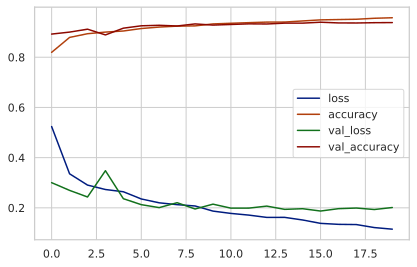

In [84]:
# Plotando histórico

pd.DataFrame(history.history).plot()
plt.show()

In [85]:
score = model.evaluate(x_test_norm, y_test_encod)

print('Loss: {:.3f}'.format(score[0]))
print('Accuracy: {:.3f}'.format(score[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.2164 - accuracy: 0.9331
Loss: 0.216
Accuracy: 0.933


Observe que o modelo manteve um desempenho semelhante com os dados de teste(dados nunca vistos), o que indica não haver overfitting no nosso modelo.

Podemos concluir, portanto, que nosso modelo é suficientemente generalista para lidar com dados novos, porém ainda pode melhorar na previsão de certos labels, como Camisas e Suéteres, por exemplo. 

Para esta melhoria poderíamos tentar usar a técnica ***Data Augmentation***, que consiste na "criação" de novas imagens a partir das imagens já disponíveis nos nossos dados, com rotações, espelhamento, translação, enfim, uma série de maneiras, mas foge à proposta deste simples projeto, então iremos parar por aqui.